#**Week15_예습과제_우정연**

##**8.6 토픽 모델링(Topic Modeling) - 20 뉴스그룹**

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. featch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                             categories = cats, random_state = 0)

# LDA는 Count 기반의 벡터화만 적용
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2, stop_words = 'english',
                             ngram_range = (1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape: ', feat_vect.shape)

CountVectorizer Shape:  (7862, 1000)


In [2]:
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [3]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    # components_array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스 별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)

# CountVectorizer 객체 내의 전체 word의 명칭을 get_feature_names()를 통해 추출
feature_names = count_vect.get_feature_names_out()

# 토픽 별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


##**8.7 문서 군집화 소개와 실습(Opinion Review 데이터 세트)**

In [4]:
import pandas as pd
import glob, os

from google.colab import drive
drive.mount('/content/drive')

# 각자 디렉터리 설정
path = 'drive/My Drive/Colab Notebooks/data/OpinosisDataset1.0/topics'
# path로 지정한 디렉터리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

# 개별 파일의 파일명은 filename_list 로 취합
# 개별 파일의 파일 내용은 Dataframe 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  # 개별 파일을 읽어서 DataFrame으로 생성
  df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')

  # 절대 경로로 주어진 파일명을 가공. 리눅스에서 수행할 때는 다음 \\를 /로 변경
  # 맨 마지막 .data 확장자도 제거
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]

  # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

Mounted at /content/drive


,filename,opinion_text
0,battery-life_ipod_nano_8gb,...
1,speed_windows7,...
2,voice_garmin_nuvi_255W_gps,...
3,accuracy_garmin_nuvi_255W_gps,...
4,display_garmin_nuvi_255W_gps,...


In [5]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

nltk.download('punkt')

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환.
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt_tab')
nltk.download('wordnet')

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range=(1,2), min_df=0.05, max_df = 0.85)
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

from sklearn.cluster import KMeans

# 5개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters = 5, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

document_df['cluster_label'] = cluster_label
document_df.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,4
1,speed_windows7,...,4
2,voice_garmin_nuvi_255W_gps,...,4
3,accuracy_garmin_nuvi_255W_gps,...,4
4,display_garmin_nuvi_255W_gps,...,3


In [7]:
document_df[document_df['cluster_label']==0].sort_values(by='filename')

,filename,opinion_text,cluster_label
21,buttons_amazon_kindle,...,0
28,eyesight-issues_amazon_kindle,...,0
34,fonts_amazon_kindle,...,0
24,navigation_amazon_kindle,...,0
27,price_amazon_kindle,...,0
14,updates_garmin_nuvi_255W_gps,...,0


In [8]:
document_df[document_df['cluster_label']==1].sort_values(by='filename')

,filename,opinion_text,cluster_label
43,bathroom_bestwestern_hotel_sfo,...,1
39,free_bestwestern_hotel_sfo,...,1
50,location_bestwestern_hotel_sfo,...,1
19,location_holiday_inn_london,...,1
44,parking_bestwestern_hotel_sfo,...,1
31,price_holiday_inn_london,...,1
26,room_holiday_inn_london,...,1
41,rooms_bestwestern_hotel_sfo,...,1
36,rooms_swissotel_chicago,...,1
48,staff_bestwestern_hotel_sfo,...,1


In [9]:
document_df[document_df['cluster_label']==2].sort_values(by='filename')

,filename,opinion_text,cluster_label
20,food_holiday_inn_london,...,2
33,food_swissotel_chicago,...,2
42,service_bestwestern_hotel_sfo,...,2
35,service_holiday_inn_london,...,2
25,service_swissotel_hotel_chicago,...,2


In [10]:
document_df[document_df['cluster_label']==3].sort_values(by='filename')

,filename,opinion_text,cluster_label
49,comfort_honda_accord_2008,...,3
32,comfort_toyota_camry_2007,...,3
4,display_garmin_nuvi_255W_gps,...,3
11,features_windows7,...,3
29,gas_mileage_toyota_camry_2007,...,3
37,interior_honda_accord_2008,...,3
18,interior_toyota_camry_2007,...,3
46,mileage_honda_accord_2008,...,3
40,performance_honda_accord_2008,...,3
47,quality_toyota_camry_2007,...,3


In [11]:
document_df[document_df['cluster_label']==4].sort_values(by='filename')

,filename,opinion_text,cluster_label
3,accuracy_garmin_nuvi_255W_gps,...,4
22,battery-life_amazon_kindle,...,4
0,battery-life_ipod_nano_8gb,...,4
9,battery-life_netbook_1005ha,...,4
15,directions_garmin_nuvi_255W_gps,...,4
10,keyboard_netbook_1005ha,...,4
23,performance_netbook_1005ha,...,4
6,screen_garmin_nuvi_255W_gps,...,4
16,screen_ipod_nano_8gb,...,4
13,screen_netbook_1005ha,...,4


In [16]:
from sklearn.cluster import KMeans
# 3개의 집합으로 군집화
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당하고 cluster_label 값으로 정렬
document_df['cluster_label'] = cluster_label
document_df.sort_values(by = 'cluster_label')

,filename,opinion_text,cluster_label
0,battery-life_ipod_nano_8gb,...,0
28,eyesight-issues_amazon_kindle,...,0
27,price_amazon_kindle,...,0
24,navigation_amazon_kindle,...,0
23,performance_netbook_1005ha,...,0
22,battery-life_amazon_kindle,...,0
21,buttons_amazon_kindle,...,0
45,transmission_toyota_camry_2007,...,0
16,screen_ipod_nano_8gb,...,0
14,updates_garmin_nuvi_255W_gps,...,0


###**[군집별 핵심 단어 추출하기]**

In [17]:
cluster_centers = km_cluster.cluster_centers_
print('cluster_centers shape: ', cluster_centers.shape)
print(cluster_centers)

cluster_centers shape:  (3, 4610)
[[0.00761398 0.         0.         ... 0.00735716 0.         0.        ]
 [0.0031194  0.00114468 0.00086337 ... 0.         0.00083876 0.00012245]
 [0.         0.         0.00179017 ... 0.         0.00217814 0.00408784]]


In [26]:
# 군집 별 top n 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명을 반환함
def get_cluster_details(cluster_model, cluster_data, feature_names, clusters_num,
                        top_n_features = 10):
  cluster_details = {}

  # cluster_centers array의 값이 큰 순으로 정렬된 인덱스 값을 반환
  # 군집 중심점(centroid)별 할당된 word 피처들의 거리 값이 큰 순으로 값을 구하기 위함
  centroid_feature_ordered_ind = cluster_model.cluster_centers_.argsort()[:,::-1]

  # 개별 군집별로 반복하면서 핵심 단어, 그 단어의 중심 위치 상댓값, 대상 파일명 입력
  for cluster_num in range(clusters_num):
    # 개별 군집별 정보를 담을 데이터 초기화
    cluster_details[cluster_num] = {}
    cluster_details[cluster_num]['cluster'] = cluster_num

    # cluster_centers_.argsort()[:,::-1]로 구한 인덱스를 이용해 top n 피처 단어를 구함
    top_feature_indexes = centroid_feature_ordered_ind[cluster_num, :top_n_features]
    top_features = [feature_names[ind] for ind in top_feature_indexes]

    # top_feature_indexes를 이용해 해당 피처 단어의 중심 위치 상댓값 구함
    top_feature_values = cluster_model.cluster_centers_[cluster_num,
                                                        top_feature_indexes].tolist()

    # cluster_details 딕셔너리 객체에 개별 군집별 핵심단어와 중심위치 상댓값, 해당 파일명 입력
    cluster_details[cluster_num]['top_features'] = top_features
    cluster_details[cluster_num]['top_features_value'] = top_feature_values
    filenames = cluster_data[cluster_data['cluster_label'] == cluster_num]['filename']
    filenames = filenames.values.tolist()

    cluster_details[cluster_num]['filenames'] = filenames

  return cluster_details

def print_cluster_details(cluster_details):
    for cluster_num, cluster_detail in cluster_details.items():
      print('###### Cluster {0}'.format(cluster_num))
      print('Top features:', cluster_detail['top_features'])
      print('Reviews 파일명:', cluster_detail['filenames'][:7])
      print('=============================================')

In [27]:
feature_names = tfidf_vect.get_feature_names_out()

cluster_details = get_cluster_details(cluster_model = km_cluster, cluster_data = document_df,
                                      feature_names = feature_names, clusters_num = 3, top_n_features =10)
print_cluster_details(cluster_details)

###### Cluster 0
Top features: ['screen', 'battery', 'keyboard', 'battery life', 'life', 'kindle', 'video', 'size', 'feature', 'button']
Reviews 파일명: ['battery-life_ipod_nano_8gb', 'speed_windows7', 'voice_garmin_nuvi_255W_gps', 'display_garmin_nuvi_255W_gps', 'video_ipod_nano_8gb', 'screen_garmin_nuvi_255W_gps', 'speed_garmin_nuvi_255W_gps']
###### Cluster 1
Top features: ['room', 'interior', 'hotel', 'staff', 'seat', 'location', 'mileage', 'comfortable', 'gas', 'car']
Reviews 파일명: ['accuracy_garmin_nuvi_255W_gps', 'directions_garmin_nuvi_255W_gps', 'interior_toyota_camry_2007', 'location_holiday_inn_london', 'room_holiday_inn_london', 'gas_mileage_toyota_camry_2007', 'staff_swissotel_chicago']
###### Cluster 2
Top features: ['service', 'food', 'hotel', 'room', 'room service', 'service wa', 'restaurant', 'breakfast', 'staff', 'food wa']
Reviews 파일명: ['food_holiday_inn_london', 'service_swissotel_hotel_chicago', 'food_swissotel_chicago', 'service_holiday_inn_london', 'service_bestweste

##**8.8 문서 유사도**

In [28]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1,v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product / l2_norm

  return similarity


from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends',
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [30]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()

# 첫 번째 문장과 두 번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect2 = np.array(feature_vect_dense[1]).reshape(-1, )

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 두 개 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장1, 문장2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장2 Cosine 유사도: 0.402


In [31]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect1, vect3)
print('문장1, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1, )
vect3 = np.array(feature_vect_dense[2]).reshape(-1, )
similarity_simple = cos_similarity(vect2, vect3)
print('문장2, 문장3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장1, 문장3 Cosine 유사도: 0.404
문장2, 문장3 Cosine 유사도: 0.456


In [32]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)


[[1.         0.40207758 0.40425045]]


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [34]:
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)


[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


###**[Opinion Review 데이터 세트를 이용한 문서 유사도 측정]**

In [37]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = 'drive/My Drive/Colab Notebooks/data/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
  df = pd.read_table(file_, index_col = None, header = 0, encoding = 'latin1')
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  filename_list.append(filename)
  opinion_text.append(df.to_string())

document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer = LemNormalize, stop_words = 'english',
                             ngram_range = (1,2), min_df = 0.05, max_df = 0.85)
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])
km_cluster = KMeans(n_clusters = 3, max_iter = 10000, random_state = 0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

from sklearn.metrics.pairwise import cosine_similarity

# cluster_label = 1 인 데이터는 호텔로 군집화된 데이터임. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label'] == 1].index
print('호텔로 군집화 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ', comparison_docname,' 와 타 문서 유사도 #####')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feautre_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


호텔로 군집화 된 문서들의 DataFrame Index: Index([ 3, 15, 18, 19, 26, 29, 30, 31, 32, 36, 37, 38, 39, 40, 41, 43, 44, 46,
       47, 48, 49, 50],
      dtype='int64')
##### 비교 기준 문서명  accuracy_garmin_nuvi_255W_gps  와 타 문서 유사도 #####
[[1.         0.34650797 0.01134673 0.03234592 0.01436106 0.02256836
  0.0100461  0.01765811 0.0203769  0.01409376 0.01343363 0.01236745
  0.00972764 0.01172539 0.01742123 0.00777394 0.01017484 0.02129358
  0.01062625 0.01542885 0.02315415 0.02549668]]


Text(0.5, 1.0, 'accuracy_garmin_nuvi_255W_gps')

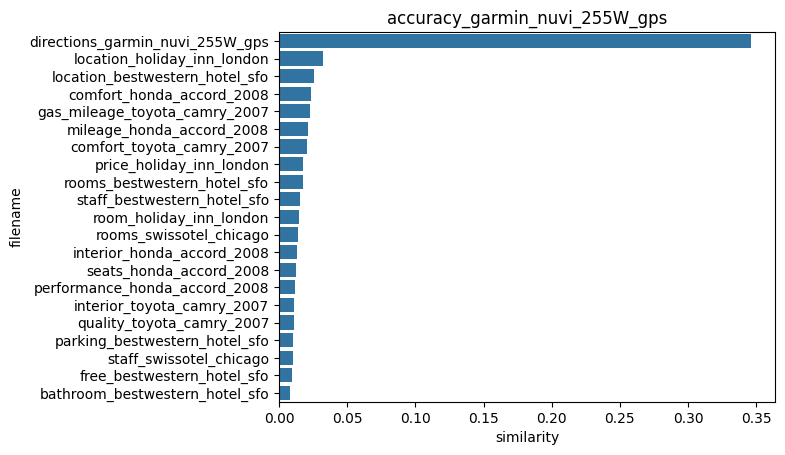

In [38]:
from tkinter.constants import S
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 첫 번째 문서와 타 문서 간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x = 'similarity', y = 'filename', data = hotel_1_sim_df)
plt.title(comparison_docname)

##**8.9 한글 텍스트 처리 - 네이버 영화 평점 감성 분석**

In [39]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.8/493.8 kB 25.3 MB/s eta 0:00:00


In [40]:
import pandas as pd

train_df = pd.read_csv('drive/My Drive/Colab Notebooks/data/ratings_train.txt', sep = '\t')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [41]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [44]:
import re
train_df = train_df.fillna(' ')
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미함)
train_df['document'] = train_df['document'].apply( lambda x : re.sub(r"\d+", " ", x))

# 테스트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('drive/My Drive/Colab Notebooks/data/ratings_test.txt', sep = '\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply( lambda x : re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

from konlpy.tag import Twitter

twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text)
  return tokens_ko

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer = tw_tokenizer, ngram_range = (1,2), min_df = 3, max_df = 0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [46]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state = 0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = { 'C': [1, 3.5, 4.5, 5.5, 10] }

grid_cv = GridSearchCV(lg_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_, 4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'C': 3.5} 0.8596


In [48]:
from sklearn.metrics import accuracy_score

# 학습 데이터를 적용한 TfidfVectorizer를 이요해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86182
